In [80]:
import argparse
import numpy as np
from softlearning.environments.adapters.gym_adapter import GymAdapter
import gym
import multiworld
multiworld.register_all_envs()
import imageio
import pickle
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import skimage

%matplotlib inline

In [91]:
exp_name = 'pointmass_boxwall'

In [92]:
cur_dir = os.getcwd()
directory = os.path.join(cur_dir, exp_name)
if not os.path.exists(directory):
    os.makedirs(directory)
directory

'/home/justinvyu/dev/vice/notebooks/pointmass_boxwall'

In [93]:
images = True
NUM_TOTAL_EXAMPLES, ROLLOUT_LENGTH, STEPS_PER_SAMPLE = 300, 15, 1
univ = 'gym'
domain = 'Point2D'
task = 'BoxWall-v1'

# === SET GOAL ===
goal_x, goal_y = (3.5, 3.5)
eps = 0.25      # Within 0.25 distance
# ================

init_pos_range = ((goal_x - eps, goal_y - eps), (goal_x + eps, goal_y + eps))
target_pos_range = ((goal_x, goal_y), (goal_x, goal_y))

env_kwargs = {
    'action_scale': 0.5,
    'init_pos_range': init_pos_range,
    'target_pos_range': target_pos_range,
    'render_target': True,
    'images_are_rgb': True,
    'render_onscreen': False,
    'render_size': 200,
    'observation_keys': ('state_observation', 'state_desired_goal')
}
env = GymAdapter(
    domain=domain,
    task=task,
    **env_kwargs
) 

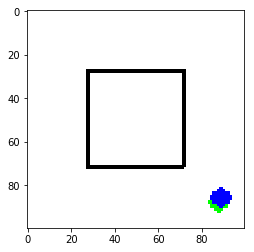

In [94]:
obs = env.reset()
plt.imshow(env.render('rgb_array'))
plt.show()

In [70]:
env.step(env.action_space.sample())

({'state_observation': array([1.57867189, 2.2708489 ]),
  'state_desired_goal': array([2., 2.])},
 -0.5008757369341235,
 False,
 {'radius': 0.5,
  'target_position': array([2., 2.]),
  'distance_to_target': 0.5008757369341235,
  'velocity': array([-0.41685396,  0.16330159], dtype=float32),
  'speed': 0.44769925,
  'is_success': False})

In [95]:
observations = []
num_positives = 0

In [96]:
# reset the environment
while num_positives <= NUM_TOTAL_EXAMPLES:
    observation = env.reset()
    t = 0
    while t < ROLLOUT_LENGTH:
        action = env.action_space.sample()
        
        for _ in range(STEPS_PER_SAMPLE):
            obs, rew, done, info = env.step(action)
        
        if info['distance_to_target'] < eps:
            observations.append(observation)
            num_positives += 1
        
        t += 1
#             plt.imshow(env.render('rgb_array'))
#             plt.show()

In [97]:
goal_examples = {
    key: np.concatenate([
        obs[key][None] for obs in observations
    ], axis=0)
    for key in observations[0].keys()
}
with open(os.path.join(directory, 'positives.pkl'), 'wb') as file:
    pickle.dump(goal_examples, file)